# Capston Project | Yelp

## 1. Pre-processing Data
### 1.1 Import Data

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# create a function that reads in json files
def read_json(name):
    # read the entire file into a python array
    with open('datasets/{}.json'.format(name), 'rb') as f:
        data = f.readlines()

    # remove the trailing "\n" from each line
    data = map(lambda x: x.rstrip(), data)

    # each element of 'data' is an individual JSON object.
    # i want to convert it into an *array* of JSON objects
    # which, in and of itself, is one large JSON object
    # basically... add square brackets to the beginning
    # and end, and have all the individual business JSON objects
    # separated by a comma
    data_json_str = "[" + ','.join(data) + "]"
    print 'File: ' + name
    # now, load it into pandas
    return pd.read_json(data_json_str)
    print 'Done!'

In [3]:
business = read_json('business')
checkin = read_json('checkin')
review = read_json('review')
tip = read_json('tip')
user = read_json('user')

File: business
File: checkin
File: review
File: tip
File: user


0

### 1.2 Clean Data 

- 2.2M reviews and 591K tips by 552K users for 77K businesses
- 566K business attributes, e.g., hours, parking availability, ambience.
- Social network of 552K users for a total of 3.5M social edges.
- Aggregated check-ins over time for each of the 77K businesses
- 200,000 pictures from the included businesses

- 5 files: businesss(77,445 rows), checkin(55,569 rows), review(2,225,213 rows), tip(591,864 rows), user(552,339 rows) 

#### dataframe - business

In [142]:
# check business dataframe
business.head(5)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,kids,groups,alcohol,happy_hour,wifi,wheelchair,appointment_only,dancing,coatcheck,dogs
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],...,True,True,none,False,NaN,False,False,False,False,False
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],...,False,True,NaN,True,NaN,False,False,False,False,False
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],...,False,False,NaN,False,NaN,False,False,False,False,False
3,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],...,True,False,NaN,False,NaN,False,False,False,False,False
4,"{u'Accepts Credit Cards': False, u'Price Range...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon,[],...,False,False,NaN,False,NaN,False,False,False,False,False


In [4]:
# check attribute columns (How many attributes and how many resturants has those attributes)
attributes = []
for x in range(len(business.attributes)):
    attributes.extend(business.attributes[x].keys())

In [5]:
# check how many unique attribute and how many business contains those attributes.
from collections import Counter
import operator
attribute_sort = sorted(Counter(attributes).items(), key=operator.itemgetter(1), reverse=True)
print len(attribute_sort)
attribute_sort

36


[(u'Accepts Credit Cards', 56528),
 (u'Price Range', 50070),
 (u'Parking', 44617),
 (u'Good for Kids', 30328),
 (u'Outdoor Seating', 26601),
 (u'Good For Groups', 26011),
 (u'Delivery', 23624),
 (u'Take-out', 23601),
 (u'Attire', 23487),
 (u'Alcohol', 23328),
 (u'Takes Reservations', 23072),
 (u'Has TV', 22703),
 (u'Wheelchair Accessible', 22511),
 (u'Good For', 22080),
 (u'Wi-Fi', 21624),
 (u'Ambience', 21447),
 (u'Waiter Service', 21332),
 (u'Noise Level', 21305),
 (u'Caters', 15852),
 (u'By Appointment Only', 11744),
 (u'Smoking', 4797),
 (u'Happy Hour', 4572),
 (u'Good For Dancing', 4449),
 (u'Coat Check', 4398),
 (u'Music', 4323),
 (u'Dogs Allowed', 3931),
 (u'Drive-Thru', 3325),
 (u'BYOB/Corkage', 1315),
 (u'BYOB', 849),
 (u'Corkage', 631),
 (u'Accepts Insurance', 608),
 (u'Hair Types Specialized In', 441),
 (u'Order at Counter', 376),
 (u'Open 24 Hours', 321),
 (u'Ages Allowed', 253),
 (u'Dietary Restrictions', 156)]

In [6]:
# unpack attributes from the attrribute columns 
%time
#  (u'Accepts Credit Cards', 56528)
credit_card = []
for x in range(len(business.attributes)):
    try: 
        credit_card.append(business.attributes[x]['Accepts Credit Cards'])
    except: 
        credit_card.append(False)
business['credit_card'] = credit_card

#  (u'Price Range', 50070)
price = []
for x in range(len(business.attributes)):
    try: 
        price.append(business.attributes[x]['Price Range'])
    except: 
        price.append('unknown')
business['price'] =  price

#  (u'Parking', 44617)
parking = []
for x in range(len(business.attributes)):
    try: 
        parking.append(business.attributes[x]['Parking'])
    except: 
        parking.append(False)
business['parking'] = parking 

#  (u'Good for Kids', 30328)
kids = []
for x in range(len(business.attributes)):
    try: 
        kids.append(business.attributes[x]['Good for Kids'])
    except: 
        kids.append('unknown')
business['kids'] = kids

#  (u'Outdoor Seating', 26601)
outdoor_seating = []
for x in range(len(business.attributes)):
    try: 
        outdoor_seating.append(business.attributes[x]['Outdoor Seating'])
    except: 
        outdoor_seating.append('unknown')  
business['ourdoor_seating'] = outdoor_seating 

#  (u'Good For Groups', 26011)
groups = []
for x in range(len(business.attributes)):
    try: 
        groups.append(business.attributes[x]['Good For Groups'])
    except: 
        groups.append('unknown')
business['groups'] = groups

#  (u'Delivery', 23624)
delivery = []
for x in range(len(business.attributes)):
    try: 
        delivery.append(business.attributes[x]['Delivery'])
    except: 
        delivery.append(False)
business['delivery'] = delivery 

#  (u'Take-out', 23601)
take_out = []
for x in range(len(business.attributes)):
    try:
        take_out.append(business.attributes[x]['Take-out'])
    except: 
        take_out.append(False)
business['take_out'] = take_out

#  (u'Attire', 23487)
attire = []
for x in range(len(business.attributes)):
    try: 
        attire.append(business.attributes[x]['Attire'])
    except: 
        attire.append('unknown')
business['attire'] = attire

#  (u'Alcohol', 23328)
alcohol = []
for x in range(len(business.attributes)):
    try: 
        alcohol.append(business.attributes[x]['Alcohol'])
    except:
        alcohol.append('unknown')
business['alcohol'] = alcohol 

#  (u'Takes Reservations', 23072)
reservation = []
for x in range(len(business.attributes)):
    try: 
        reservation.append(business.attributes[x]['Takes Reservations'])
    except: 
        reservation.append('unknown')
business['reservation'] = reservation

#  (u'Has TV', 22703)
TV = []
for x in range(len(business.attributes)):
    try: 
        TV.append(business.attributes[x]['Has TV'])
    except: 
        TV.append('unknown')
business['tv'] = TV

#  (u'Wheelchair Accessible', 22511)
wheelchair = []
for x in range(len(business.attributes)):
    try: 
        wheelchair.append(business.attributes[x]['Wheelchair Accessible'])
    except: 
        wheelchair.append(False)
business['wheelchair'] = wheelchair

#  (u'Wi-Fi', 21624)
wifi = []
for x in range(len(business.attributes)):
    try: 
        wifi.append(business.attributes[x]['Wi-Fi'])
    except: 
        wifi.append('unknown')
business['wifi'] = wifi

#  (u'Waiter Service', 21332)
waiter = []
for x in range(len(business.attributes)):
    try: 
        waiter.append(business.attributes[x]['Waiter Service'])
    except: 
        waiter.append('unknown')
business['waiter'] = waiter

#  (u'Noise Level', 21305)
noise = []
for x in range(len(business.attributes)):
    try: 
        noise.append(business.attributes[x]['Noise Level'])
    except: 
        noise.append('unknown')
business['noise'] = noise 
              
#  (u'Caters', 15852)       
cater = []
for x in range(len(business.attributes)):
    try: 
        cater.append(business.attributes[x]['Caters'])
    except: 
        cater.append(False)
business['cater'] = cater

#  (u'By Appointment Only', 11744)
appointment_only = []
for x in range(len(business.attributes)):
    try: 
        appointment_only.append(business.attributes[x]['By Appointment Only'])
    except: 
        appointment_only.append(False)
business['appointment_only'] = appointment_only

#  (u'Happy Hour', 4572)
happy_hour = []
for x in range(len(business.attributes)):
    try: 
        happy_hour.append(business.attributes[x]['Happy Hour'])
    except: 
        happy_hour.append(False)
business['happy_hour'] = happy_hour

#  (u'Good For Dancing', 4449)
dancing = []
for x in range(len(business.attributes)):
    try: 
        dancing.append(business.attributes[x]['Good For Dancing'])
    except: 
        dancing.append(False)
business['dancing'] = dancing

#  (u'Coat Check', 4398)
coatcheck = []
for x in range(len(business.attributes)):
    try: 
        coatcheck.append(business.attributes[x]['Coat Check'])
    except: 
        coatcheck.append('unknown')
business['coatcheck'] = coatcheck

#  (u'Dogs Allowed', 3931)
dogs = []
for x in range(len(business.attributes)):
    try: 
        dogs.append(business.attributes[x]['Dogs Allowed'])
    except: 
        dogs.append(False)
business['dogs'] = dogs

#  (u'Drive-Thru', 3325)
drive_thru = []
for x in range(len(business.attributes)):
    try: 
        drive_thru.append(business.attributes[x]['Drive-Thru'])
    except: 
        drive_thru.append(False)
business['drive_thru'] = drive_thru


CPU times: user 10 µs, sys: 19 µs, total: 29 µs
Wall time: 39.1 µs


In [7]:
# clean up parking column 
parking = []
for x in range(len(business.parking)):
    try:
        if True in business.parking[x].values():
            parking.append(True)
        else:
            parking.append(False)
    except: 
        parking.append('Unknown')
business['parking'] = parking

In [34]:
sum(business.parking.value_counts())

77445

#### dataframe - review

In [9]:
review.votes[0]['cool']
review.votes[0]

{u'cool': 0, u'funny': 0, u'useful': 0}

In [10]:
cool = []
funny = []
useful = []
for x in range(len(review.votes)): 
    cool.append(review.votes[x]['cool'])
    funny.append(review.votes[x]['funny'])
    useful.append(review.votes[x]['useful'])

In [11]:
review['cool'] = cool 
review['funny'] = funny 
review['useful'] = useful 

In [50]:
review.columns

Index([u'business_id',        u'date',   u'review_id',       u'stars',
              u'text',        u'type',     u'user_id',       u'votes',
              u'cool',       u'funny',      u'useful'],
      dtype='object')

In [51]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2225213 entries, 0 to 2225212
Data columns (total 11 columns):
business_id    object
date           datetime64[ns]
review_id      object
stars          int64
text           object
type           object
user_id        object
votes          object
cool           int64
funny          int64
useful         int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 203.7+ MB


#### dataframe - user

In [13]:
cool = []
funny = []
useful = []
for x in range(len(user.votes)): 
    cool.append(user.votes[x]['cool'])
    funny.append(user.votes[x]['funny'])
    useful.append(user.votes[x]['useful'])
user['cool'] = cool 
user['funny'] = funny 
user['useful'] = useful 

In [14]:
len(user.friends[0])

202

In [15]:
number_friends = []
for x in range(len(user.friends)): 
    number_friends.append(len(user.friends[x]))

In [16]:
user['number_friends'] = number_friends

In [17]:
elites = []
for x in range(len(user.elite)):     
    elites.append(len(user.elite[x]))

In [18]:
user['elites'] = elites

In [19]:
compliment = []
number_compliments = []
for l in range(len(user.compliments)):
    total = 0
    temp = []
    for x, y in user.compliments[l].items():
        total = y + total
        temp.append(x)
    number_compliments.append(total)
    compliment.append(temp)

In [20]:
user['compliment'] = compliment
user['number_compliments'] = number_compliments

In [21]:
number_friends = []
for x in user.friends: 
    number_friends.append(len(x))
user['number_friends'] = number_friends

In [35]:
comp = []
for x in range(len(user.compliments)):
    comp.extend(user.compliments[x].keys())

In [36]:
from collections import Counter
import operator
comp_sort = sorted(Counter(comp).items(), key=operator.itemgetter(1), reverse=True)
print len(comp_sort)
comp_sort

11


[(u'plain', 109708),
 (u'cool', 92487),
 (u'note', 90908),
 (u'writer', 72650),
 (u'hot', 68111),
 (u'funny', 63738),
 (u'more', 52877),
 (u'photos', 36815),
 (u'cute', 24197),
 (u'profile', 22286),
 (u'list', 12273)]

In [44]:
# (u'plain', 109708) #  (u'note', 90908)#  (u'writer', 72650)--> just a note, could be anything 
#  (u'cool', 92487)
cool_user = []
for x in range(len(user.compliments)):
    try: 
        cool_user.append(user.compliments[x]['cool'])
    except: 
        cool_user.append(0)
user['cool_user'] = cool_user

#  (u'hot', 68111)
hot_user = []
for x in range(len(user.compliments)):
    try: 
        hot_user.append(user.compliments[x]['hot'])
    except: 
        hot_user.append(0)
user['hot_user'] = hot_user

#  (u'funny', 63738)
funny_user = []
for x in range(len(user.compliments)):
    try: 
        funny_user.append(user.compliments[x]['funny'])
    except: 
        funny_user.append(0)
user['funny_user'] = funny_user

#  (u'more', 52877)
pop_user = []
for x in range(len(user.compliments)):
    try: 
        pop_user.append(user.compliments[x]['more'])
    except: 
        pop_user.append(0)
user['pop_user'] = pop_user

#  (u'photos', 36815) + (u'cute', 24197) (great photos + cute photos)
photo_user = []
for x in range(len(user.compliments)):
    try: 
        photo_user.append(user.compliments[x]['photos'] + user.compliments[x]['photos'])
    except:
        photo_user.append(0)
user['photo_user'] = photo_user

#  (u'list', 12273)
list_user = []
for x in range(len(user.compliments)):
    try: 
        list_user.append(user.compliments[x]['list'])
    except: 
        list_user.append(0)
user['list_user'] = list_user


In [61]:
tip.head()

,business_id,date,likes,text,type,user_id
0,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
1,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw
2,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,tip,xb6zEQCw9I-Gl0g06e1KsQ
3,KayYbHCt-RkbGcPdGOThNg,2015-07-08,0,"Friendly staff, good food, great beer selectio...",tip,QawZN4PSW7ng_9SP7pjsVQ
4,1_lU0-eSWJCRvNGk78Zh9Q,2015-10-25,0,Beautiful restoration.,tip,MLQre1nvUtW-RqMTc4iC9A


### 1.3 merge and save dataframes

#### review 

In [ ]:
review_sample = review.sample(frac=0.001, replace=False, weights = 'stars')

In [48]:
temp = business.merge(review_sample, left_on='business_id', right_on = 'business_id', how = 'inner')
df = temp.merge(user, left_on='user_id', right_on = 'user_id', how = 'left')
df.to_csv('merged_tip_sample.csv', encoding='utf-8')

In [55]:
temp = business.merge(review, left_on='business_id', right_on = 'business_id', how = 'inner')
full_df = temp.merge(user, left_on='user_id', right_on = 'user_id', how = 'left')
full_df.to_csv('merged_review.csv', encoding='utf-8')
os.system('say "Hi! I am done!"')

#### Tips

In [ ]:
tip_sample = tip.sample(frac=0.01, replace=False, weights = 'business_id')

In [ ]:
temp = business.merge(tip_sample, left_on='business_id', right_on = 'business_id', how = 'inner')
df_tip = temp.merge(user, left_on='user_id', right_on = 'user_id', how = 'left')
df_tip.to_csv('merged_tip_sample.csv', encoding='utf-8')

In [58]:
temp = business.merge(tip, left_on='business_id', right_on = 'business_id', how = 'inner')
full_df_tip = temp.merge(user, left_on='user_id', right_on = 'user_id', how = 'left')
full_df_tip.to_csv('merged_tip.csv', encoding='utf-8')

## 2. EDA

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('fivethirtyeight')
import seaborn as sns

In [ ]:
sns.pairplot(review)

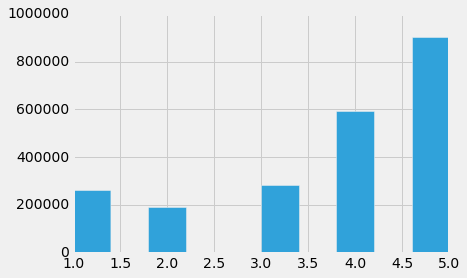

In [165]:
review.stars.hist()

In [ ]:
sns.pairplot(user)

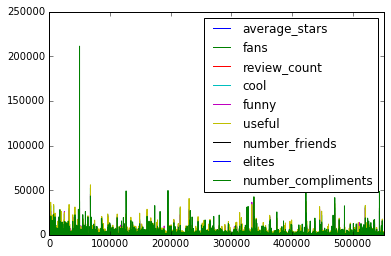

In [163]:
user.plot()

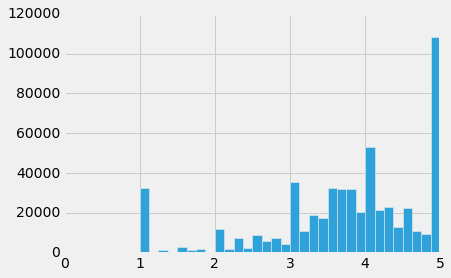

In [213]:
user.average_stars.hist(bins = 40)

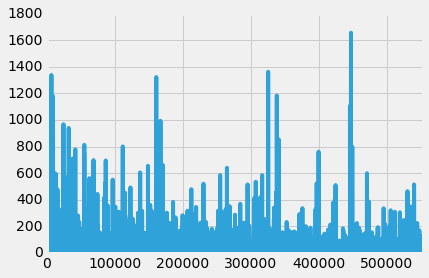

In [206]:
user.fans.plot()

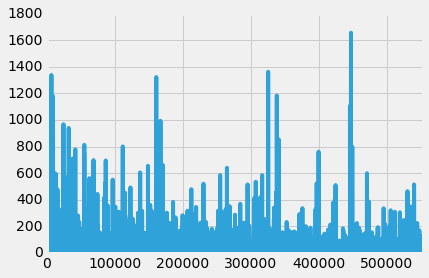

In [212]:
user.fans.plot()

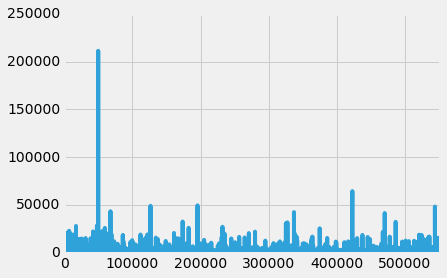

In [211]:
user.number_compliments.plot()

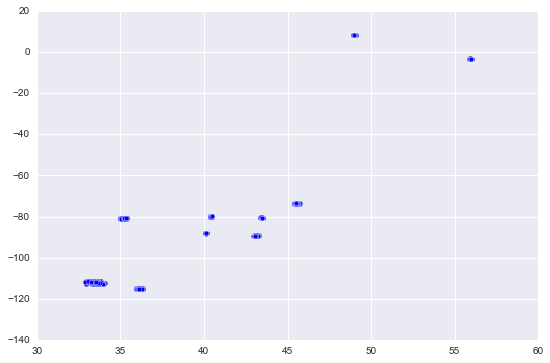

In [22]:
plt.scatter(business.latitude, business.longitude)

# Model Explorations 

### Cultural Trends: 
By adding a diverse set of cities, we want participants to compare and contrast what makes a particular city different. For example, are people in international cities less concerned about driving in to a business, indicated by their lack of mention about parking? What cuisines are Yelpers raving about in these different countries? Do Americans tend to eat out late compared to the Germans and English? In which countries are Yelpers sticklers for service quality? In international cities such as Montreal, are French speakers reviewing places differently than English speakers?



In [179]:
df.columns

Index([        u'attributes',        u'business_id',         u'categories',
                     u'city',       u'full_address',              u'hours',
                 u'latitude',          u'longitude',             u'name_x',
            u'neighborhoods',               u'open',     u'review_count_x',
                  u'stars_x',              u'state',             u'type_x',
                 u'take_out',         u'drive_thru',    u'ourdoor_seating',
                    u'cater',              u'noise',            u'parking',
                 u'delivery',             u'attire',                 u'tv',
                    u'price',        u'reservation',             u'waiter',
              u'credit_card',               u'kids',             u'groups',
                  u'alcohol',         u'happy_hour',               u'wifi',
               u'wheelchair',   u'appointment_only',            u'dancing',
                u'coatcheck',               u'dogs',               u'date',
            

In [182]:
df.head(3).T

,0,1,2
attributes,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...","{u'Take-out': True, u'Drive-Thru': False, u'Ou...","{u'Take-out': True, u'Drive-Thru': False, u'Ou..."
business_id,5UmKMjUEUNdYWqANhGckJw,5UmKMjUEUNdYWqANhGckJw,5UmKMjUEUNdYWqANhGckJw
categories,"[Fast Food, Restaurants]","[Fast Food, Restaurants]","[Fast Food, Restaurants]"
city,Dravosburg,Dravosburg,Dravosburg
full_address,"4734 Lebanon Church Rd\nDravosburg, PA 15034","4734 Lebanon Church Rd\nDravosburg, PA 15034","4734 Lebanon Church Rd\nDravosburg, PA 15034"
hours,"{u'Tuesday': {u'close': u'21:00', u'open': u'1...","{u'Tuesday': {u'close': u'21:00', u'open': u'1...","{u'Tuesday': {u'close': u'21:00', u'open': u'1..."
latitude,40.3543,40.3543,40.3543
longitude,-79.9007,-79.9007,-79.9007
name_x,Mr Hoagie,Mr Hoagie,Mr Hoagie
neighborhoods,[],[],[]


In [183]:
drop = ['votes_y','friends','elite','compliments','votes_x','type_y','user_id','type_x','review_id','attributes',\
        'business_id','full_address','hours','neighborhoods','open']
ndf = df.drop(drop, 1)

In [184]:
ndf.columns

Index([        u'categories',               u'city',           u'latitude',
                u'longitude',             u'name_x',     u'review_count_x',
                  u'stars_x',              u'state',           u'take_out',
               u'drive_thru',    u'ourdoor_seating',              u'cater',
                    u'noise',            u'parking',           u'delivery',
                   u'attire',                 u'tv',              u'price',
              u'reservation',             u'waiter',        u'credit_card',
                     u'kids',             u'groups',            u'alcohol',
               u'happy_hour',               u'wifi',         u'wheelchair',
         u'appointment_only',            u'dancing',          u'coatcheck',
                     u'dogs',               u'date',            u'stars_y',
                     u'text',             u'cool_x',            u'funny_x',
                 u'useful_x',      u'average_stars',               u'fans',
            

### Location Mining and Urban Planning: 
How much of a business' success is really just location, location, location? Do you see reviewers' behavior change when they travel?

### Seasonal Trends: 
What about seasonal effects: Are HVAC contractors being reviewed just at onset of winter, and manicure salons at onset of summer? Are there more reviews for sports bars on major game days and if so, could you predict that?

### Infer Categories: 
Do you see any non-intuitive correlations between business categories e.g., how many karaoke bars also offer Korean food, and vice versa? What businesses deserve their own subcategory (i.e., Szechuan or Hunan versus just "Chinese restaurants"), and can you learn this from the review text?

### Natural Language Processing (NLP): 
How well can you guess a review's rating from its text alone? What are the most common positive and negative words used in our reviews? Are Yelpers a sarcastic bunch? And what kinds of correlations do you see between tips and reviews: could you extract tips from reviews?

### Changepoints and Events: 
Can you detect when things change suddenly (i.e. a business coming under new management)? Can you see when a city starts going nuts over cronuts?

### Social Graph Mining: 
Can you figure out who the trend setters are and who found the best waffle joint before waffles were cool? How much influence does my social circle have on my business choices and my ratings?